### Mini_Batch_kmeans

##### Default batchsize = 100

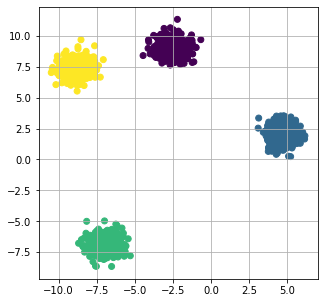

In [214]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn import datasets
from sklearn.datasets import make_blobs
from time import time
import matplotlib.pyplot as plt

n_samples = 1500
X, y = datasets.make_blobs(n_samples = n_samples,centers = 4, cluster_std = 0.6,random_state = 42)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train,y_test = train_test_split(X,y_true,test_size=0.3, shuffle=True, random_state=42)

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

In [215]:
class Mini_KMeans:
    def __init__(self, k, replacement=True, batch_size=100, max_iter=100):
        self.k = k
        self.replacement=replacement
        self.batch_size = batch_size
        self.max_iter = max_iter
    
    def fit(self, X):
        m, n = X.shape
        #1. randomly choose k clusters from X
        rng = np.random.RandomState(99)
        i = rng.permutation(m)[:self.k] # number of clusters
        self.centers = X[i]

        #having max iter makes sure it will stop eventually
        for ix in np.arange(self.max_iter):
            random = rng.randint(m)
            X_batch = X[random:random+self.batch_size]

            #2. assign labels based on closest center
            labels = pairwise_distances_argmin(X_batch, self.centers)

            #3. find new centers
            new_centers = []
            for i in range(self.k):
                new_centers.append(X_batch[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            #make sure to add rtol or atol since mini-batch does not converge
            if(np.allclose(self.centers, new_centers, rtol=0.2)):
                break
            else:
                self.centers = new_centers

        print(f"Done in {ix} iterations")

        #compute total within-variation score
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers) #<---Note I use X here.  Why?
        for i in range(self.k):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()

        print("Total with variation score: ", total_with_variation_score)
        self.distortion = total_with_variation_score

    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)

In [216]:
#main code
distortion = []
for k in range(2,7):
    print(f"====== k = {k}")
    start = time()
    model = Mini_KMeans(k)
    model.fit(X)
    distortion.append(model.distortion)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")

====== k = 2
Done in 1 iterations
Total with variation score:  49116.63920806305
Fit and predict time 0.00726771354675293
====== k = 3
Done in 9 iterations
Total with variation score:  8992.325672749414
Fit and predict time 0.008993864059448242
====== k = 4
Done in 2 iterations
Total with variation score:  1049.7443879774848
Fit and predict time 0.004775524139404297
====== k = 5
Done in 2 iterations
Total with variation score:  969.9902210650203
Fit and predict time 0.004920244216918945
====== k = 6
Done in 2 iterations
Total with variation score:  913.2020868327445
Fit and predict time 0.005125999450683594


[49116.63920806305, 8992.325672749414, 1049.7443879774848, 969.9902210650203, 913.2020868327445]


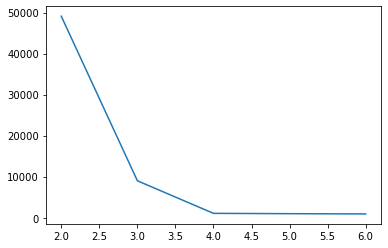

In [217]:
k = np.arange(2,7)
print(distortion)
plt.plot(k,distortion)

In [218]:
# select k
k = 4
model = Mini_KMeans(k)
model.fit(X)
preds = model.predict(X)

Done in 2 iterations
Total with variation score:  1049.7443879774848


In [210]:
# print(preds)
# print(y_test)

In [16]:
# from sklearn.metrics import classification_report
# print('======= classification report =======')
# print(classification_report(y_test, preds))

======= classification report =======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00       111

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [213]:
np.nan == np.nan


False